In [91]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.ndimage import gaussian_filter
from scipy.fftpack import fft
%matplotlib inline

In [92]:
#read csv file and return its data-frame
def read_csv_file(acc, gyro, mode):
    df_gyro = pd.read_csv(gyro, index_col=False)
    df      = pd.read_csv(acc,  index_col=False)
    df.rename(columns = {'X': 'AX', 'Y':'AY', 'Z':'AZ'}, inplace = True)
    df['GX'] = df_gyro['X']
    df['GY'] = df_gyro['Y']
    df['GZ'] = df_gyro['Z']
    
    df['activity'] = mode
    
    return df



In [115]:
#data for bike
acc_file = 'data/Bike2308/2018-08-23_16-18-07/AccelerometerLinear.csv'
gyro_file= 'data/Bike2308/2018-08-23_16-18-07/Gyroscope.csv'

df_bike = read_csv_file(acc_file, gyro_file, 'bike')
df_bike.reset_index(drop = True, inplace = True)
print("shape -", df_bike.shape)
df_bike = df_bike[3000:13000]
df_bike.reset_index(drop = True, inplace = True)
print("shape -", df_bike.shape)
df_bike.head()

shape - (14413, 8)
shape - (10000, 8)


,Milliseconds,AX,AY,AZ,GX,GY,GZ,activity
0,60002,0.946191,0.335965,-1.380772,-0.063095,-0.078720,0.035873,bike
1,60021,0.282677,0.677211,-0.592512,-0.114227,-0.141571,0.008179,bike
2,60041,0.541477,0.866996,1.060262,-0.052444,-0.141571,-0.037628,bike
3,60061,0.069439,0.456029,0.068076,0.149963,0.006500,-0.031235,bike
4,60082,0.005020,-0.462948,-1.091515,0.076462,-0.005219,-0.020584,bike


In [116]:
#data for car

acc_file = 'data/car/2018-08-17_16-43-04/AccelerometerLinear.csv'
gyro_file= 'data/car/2018-08-17_16-43-04/Gyroscope.csv'

df_car = read_csv_file(acc_file, gyro_file, 'car')

print("shape -", df_car.shape)
df_car = df_car[1300:12000]
df_car.reset_index(drop = True, inplace = True)
print("shape -", df_car.shape)
df_car.head()

shape - (6646, 8)
shape - (5346, 8)


,Milliseconds,AX,AY,AZ,GX,GY,GZ,activity
0,26000,1.310577,-0.599656,-2.653413,-0.030792,-0.118576,-0.002655,car
1,26020,0.001736,-1.469157,2.047003,-0.094711,0.188217,0.012268,car
2,26041,-0.361463,-0.839294,0.419466,0.088516,0.030563,0.010132,car
3,26061,1.720914,-0.621697,0.038787,-0.090454,-0.015244,-0.003723,car
4,26080,2.569507,-1.287929,-0.327906,-0.049973,-0.208054,-0.003723,car


Text(0,0.5,'Amplitude ($rad/s$)')

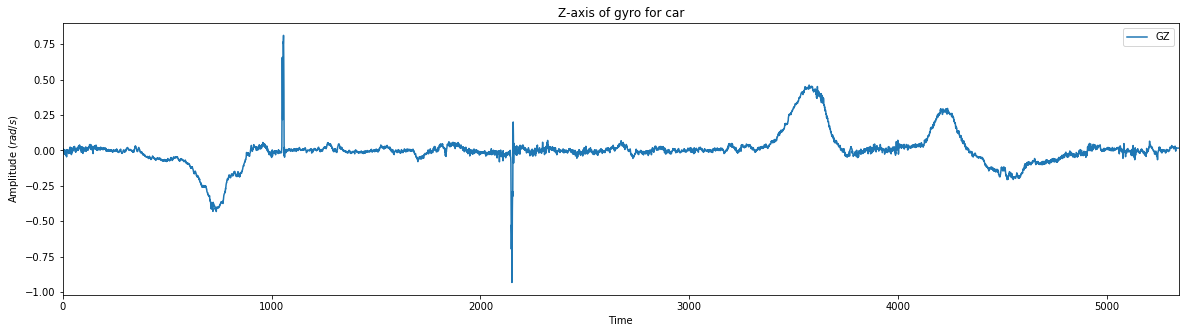

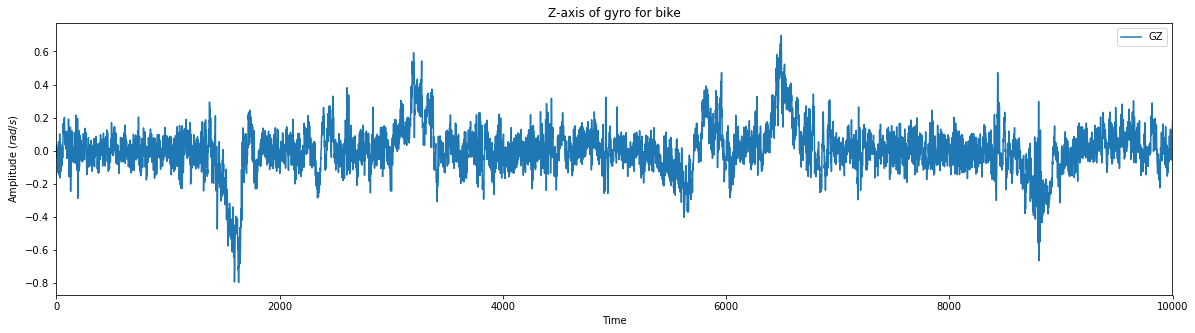

In [117]:
df_car[['GZ']].plot(figsize =(20,5), title = 'Z-axis of gyro for car')
plt.xlabel('Time')
plt.ylabel('Amplitude ($rad/s$)')

df_bike[['GZ']].plot(figsize =(20,5), title = 'Z-axis of gyro for bike')
plt.xlabel('Time')
plt.ylabel('Amplitude ($rad/s$)')

In [118]:
def GaussianFilter(df, window_length):
    df1 = df
    df1['AX'] = gaussian_filter(df['AX'], window_length)
    df1['AY'] = gaussian_filter(df['AY'], window_length)
    df1['AZ'] = gaussian_filter(df['AZ'], window_length)

    df1['GX'] = gaussian_filter(df['GX'], window_length)
    df1['GY'] = gaussian_filter(df['GY'], window_length)
    df1['GZ'] = gaussian_filter(df['GZ'], window_length)
    
    return df1


Text(0,0.5,'Amplitude ($rad/s$)')

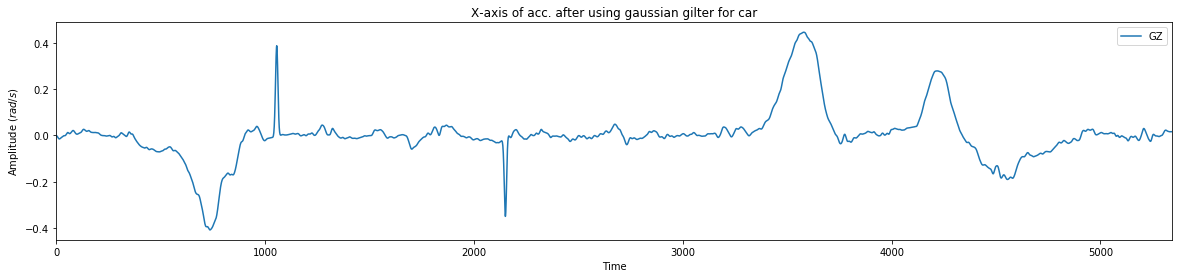

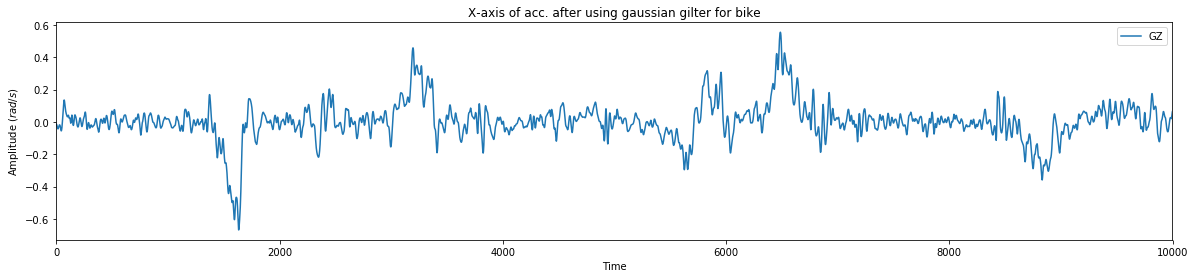

In [119]:
df_car_smooth = GaussianFilter(df_car, 5)
df_car_smooth[['GZ']].plot(figsize = (20,4), title = "X-axis of acc. after using gaussian gilter for car")
plt.xlabel('Time')
plt.ylabel('Amplitude ($rad/s$)')

df_bike_smooth = GaussianFilter(df_bike, 5)
df_bike_smooth[['GZ']].plot(figsize = (20,4), title = "X-axis of acc. after using gaussian gilter for bike")
plt.xlabel('Time')
plt.ylabel('Amplitude ($rad/s$)')


In [120]:
#generate frequency domain data from time domain data usinf Fast Fourier transformation

def FFT(df, features):
    fftfeatures = []
    
    for i in features:
        reals = np.real(np.fft.rfft(df[i]))
        imagn = np.imag(np.fft.rfft(df[i]))

        complexs = [reals[0]]
        n = len(reals)
        if(n%2 == 0):
            complexs.append(imagn[0])
        for j in range(1, n-1):
            complexs.append(reals[j])
            complexs.append(imagn[j])
#         complexs.append(reals[j])
        if( len(df) > len(complexs)):
            complexs.append(imagn[j])
        df['f'+i] = complexs
        fftfeatures.append('f'+i)
    return df,n

In [121]:
features = ['AX', 'AY', 'AZ', 'GX', 'GY', 'GZ']
df_freq_car = FFT(df_car, features)
df_freq_bike = FFT(df_bike, features)
df_freq_bike

(      Milliseconds        AX        AY        AZ        GX        GY  \
 0            60002  0.389429  0.270027 -0.179242 -0.004421 -0.066611   
 1            60021  0.383271  0.258645 -0.167288 -0.003469 -0.065612   
 2            60041  0.371673  0.237095 -0.144573 -0.001742 -0.063729   
 3            60061  0.356164  0.207692 -0.113133  0.000447 -0.061182   
 4            60082  0.338680  0.173478 -0.075654  0.002709 -0.058244   
 5            60101  0.321430  0.137947 -0.034949  0.004668 -0.055187   
 6            60121  0.306561  0.104570  0.006283  0.006045 -0.052221   
 7            60142  0.295824  0.076417  0.045714  0.006703 -0.049469   
 8            60161  0.290413  0.055776  0.081315  0.006645 -0.046958   
 9            60181  0.290700  0.043943  0.111431  0.006007 -0.044629   
 10           60201  0.296100  0.041187  0.134819  0.005016 -0.042351   
 11           60222  0.305265  0.046657  0.150422  0.003937 -0.039965   
 12           60242  0.316166  0.058530  0.157458  

In [122]:
# from scipy.fftpack import fft

# # Nyquist Sampling Criteria
# T = 1/50  # inverse of the sampling rate
# n = len(df_car)
# x = np.linspace(0.0, 1.0/(2.0*T), int(n/2))

# # FFT algorithm
# yr = fft(df_car['AX']) # "raw" FFT with both + and - frequencies
# y = 2/n * np.abs(yr[0:np.int(n/2)]) # positive freqs only

# # Plotting the results
# plt.plot(x, y)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude (m/s^2)')
# plt.title('Frequency Domain (Healthy Machinery)');

In [123]:
df_freq_car[['fGY']].plot(figsize =(20,5), title = "freq. distribition of Y- axis for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')
df_freq_bike[['fGY']].plot(figsize =(20,5), title = "freq. distribition of Y- axis for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

TypeError: tuple indices must be integers or slices, not list

In [124]:
df_freq_car[['fGZ']].plot(figsize =(20,5), title = "freq. distribition of Z- axis for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')
df_freq_bike[['fGZ']].plot(figsize =(20,5), title = "freq. distribition of Z- axis for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

TypeError: tuple indices must be integers or slices, not list

In [125]:
df_freq_car[['fGX']].plot(figsize =(20,5), title = "freq. distribition of X- axis of gyro for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')
df_freq_bike[['fGX']].plot(figsize =(20,5), title = "freq. distribition of X- axis of gyro for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

TypeError: tuple indices must be integers or slices, not list

In [126]:
df_freq_car[['fAZ']].plot(figsize =(20,5), title = "freq. distribition of X- axis of acc. for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')
df_freq_bike[['fAZ']].plot(figsize =(20,5), title = "freq. distribition of X- axis of acc. for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

TypeError: tuple indices must be integers or slices, not list

In [127]:
df_freq_car[['fAY']].plot(figsize =(20,5), title = "freq. distribition of Y- axis of acc. for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')
df_freq_bike[['fAY']].plot(figsize =(20,5), title = "freq. distribition of Y- axis of acc. for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

TypeError: tuple indices must be integers or slices, not list

Text(0,0.5,'Amplitude ($rad/s$)')

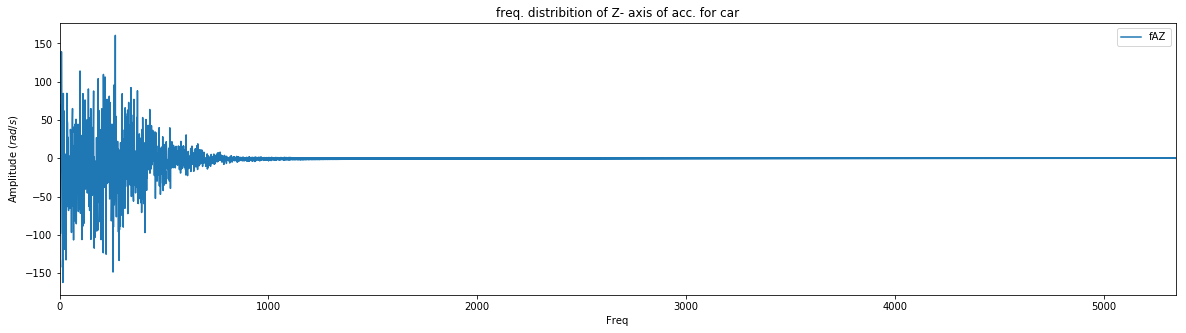

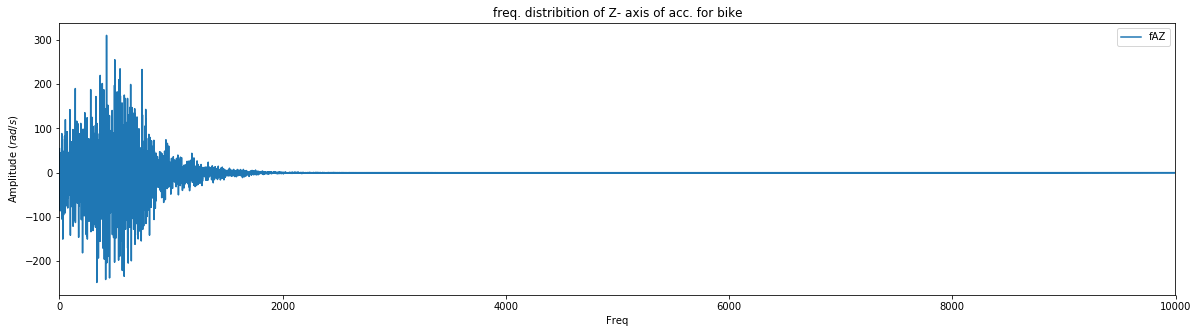

In [74]:
df_freq_car[['fAZ']].plot(figsize =(20,5), title = "freq. distribition of Z- axis of acc. for car")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')

df_freq_bike[['fAZ']].plot(figsize =(20,5), title = "freq. distribition of Z- axis of acc. for bike")
plt.xlabel('Freq')
plt.ylabel('Amplitude ($rad/s$)')